# Compare uncorrected, Bonferroni-corrected, and Metasoft eQTL datasets

## Outline

* Housekeeping
  * [Background](#Background)
  * [Imports](#Imports)
  * [Functions](#Functions)
* Analyses

---

## Housekeeping

### Background

* Want to compare the effect of using Bonferroni-correction on number of tissues affected per eQTL and see how this also compares to Metasoft multi-tissue method

In [1]:
options(jupyter.plot_mimetypes = 'image/png')

### Imports

In [2]:
library(ggplot2)
library(extrafont)
library(scales)
library(reshape2)
library(forcats)
library(ggrepel)
library(patchwork)
library(cowplot)
library(viridis)

Registering fonts with R


Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots


Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:scales’:

    viridis_pal




In [3]:
theme_Publication <- function(base_size=14, base_family="Helvetica") {
      library(grid)
      library(ggthemes)
      (theme_foundation(base_size=base_size, base_family=base_family)
       + theme(plot.title = element_text(face = "bold",
                                         size = rel(1.2), hjust = 0.5),
               text = element_text(),
               panel.background = element_rect(colour = NA),
               plot.background = element_rect(colour = NA),
               panel.border = element_rect(colour = NA),
               axis.title = element_text(face = "bold",size = rel(1)),
               axis.title.y = element_text(angle=90,vjust =2),
               axis.title.x = element_text(vjust = -0.2),
               axis.text = element_text(), 
               axis.line = element_line(colour="black"),
               axis.ticks = element_line(),
               panel.grid.major = element_line(colour="#f0f0f0"),
               panel.grid.minor = element_blank(),
               legend.key = element_rect(colour = NA),
               legend.position = "bottom",
               legend.direction = "horizontal",
               legend.key.size= unit(0.2, "cm"),
               legend.spacing = unit(0, "cm"),
               legend.title = element_text(face="italic"),
               plot.margin=unit(c(10,5,5,5),"mm"),
               strip.background=element_rect(colour="#f0f0f0",fill="#f0f0f0"),
               strip.text = element_text(face="bold")
          ))
      
}

scale_fill_Publication <- function(...){
      library(scales)
      discrete_scale("fill","Publication",manual_pal(values = c("#386cb0","#fdb462","#7fc97f","#ef3b2c","#662506","#a6cee3","#fb9a99","#984ea3","#ffff33")), ...)

}

scale_colour_Publication <- function(...){
      library(scales)
      discrete_scale("colour","Publication",manual_pal(values = c("#386cb0","#fdb462","#7fc97f","#ef3b2c","#662506","#a6cee3","#fb9a99","#984ea3","#ffff33")), ...)

}

## Analysis

### Uncorrected vs Bonferroni-corrected

In [4]:
eQTLsAndNumTissuesAffected <- read.csv(file="../outputFiles/GTExV7/eQTLsAndNumTissuesAffected.txt", header=TRUE)

In [5]:
summary(eQTLsAndNumTissuesAffected)

  variant_id          gene_id          countUncorrected
 Length:7627598     Length:7627598     Min.   : 1.000  
 Class :character   Class :character   1st Qu.: 1.000  
 Mode  :character   Mode  :character   Median : 2.000  
                                       Mean   : 4.822  
                                       3rd Qu.: 4.000  
                                       Max.   :48.000  
 countBonferroniCorrected countMetasoft  
 Min.   : 0.000           Min.   : 0.00  
 1st Qu.: 0.000           1st Qu.: 2.00  
 Median : 1.000           Median :11.00  
 Mean   : 2.978           Mean   :16.52  
 3rd Qu.: 2.000           3rd Qu.:30.00  
 Max.   :48.000           Max.   :48.00  

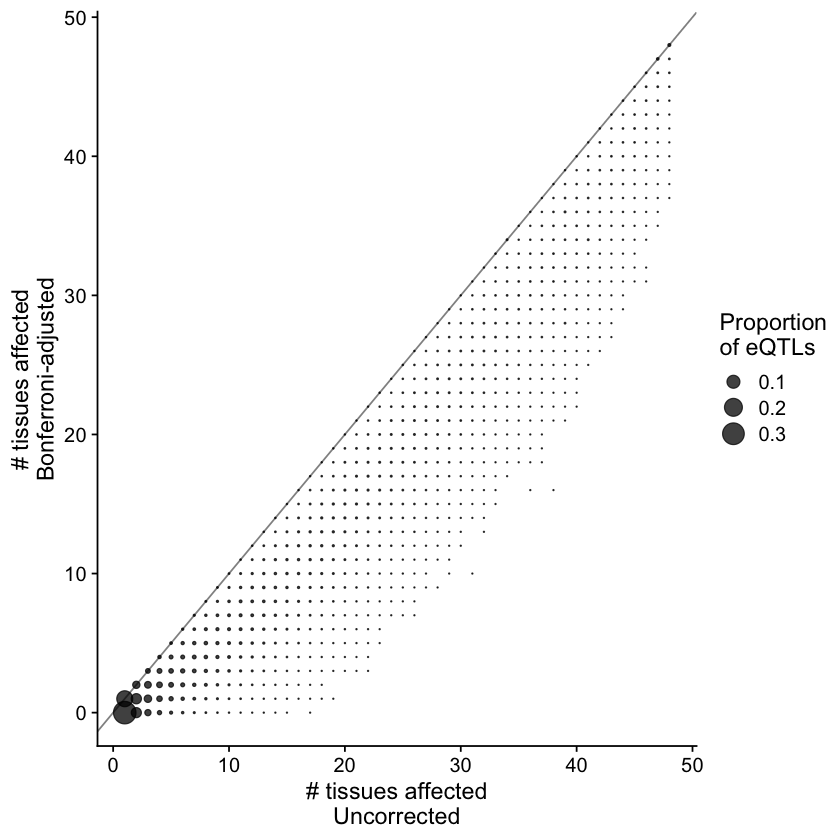

In [6]:
dotplot <- ggplot(eQTLsAndNumTissuesAffected, aes(countUncorrected, countBonferroniCorrected)) +
geom_count(aes(size = ..prop..), alpha=0.75) +
geom_abline(intercept = 0, slope = 1, alpha=0.5) +
scale_size_area("Proportion\nof eQTLs") +
labs(x = "# tissues affected\nUncorrected", y = "# tissues affected\nBonferroni-adjusted") +
theme_cowplot() +
theme(legend.position = "right", legend.direction = "vertical")
dotplot

In [7]:
BonferroniUncorrectedGrouped <- aggregate(eQTLsAndNumTissuesAffected, by=list(eQTLsAndNumTissuesAffected$countUncorrected, eQTLsAndNumTissuesAffected$countBonferroniCorrected), FUN=length)[c('Group.1','Group.2','gene_id')]
BonferroniUncorrectedGrouped

Group.1,Group.2,gene_id
<int>,<dbl>,<int>
1,0,2473766
2,0,437654
3,0,140280
4,0,52360
5,0,20076
6,0,9047
7,0,3773
8,0,1749
9,0,777


In [8]:
BonferroniUncorrectedGrouped$proportion <- BonferroniUncorrectedGrouped$gene_id / sum(BonferroniUncorrectedGrouped$gene_id)

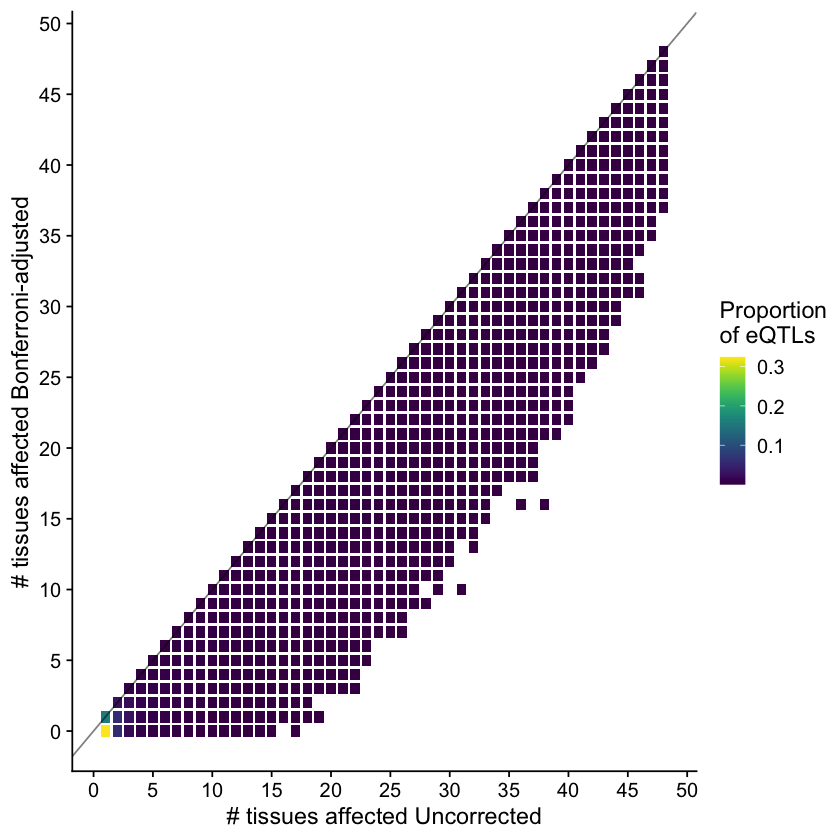

In [9]:
heatmap1 <- ggplot(BonferroniUncorrectedGrouped, aes(Group.1, Group.2)) +
geom_tile(aes(fill = proportion), width=0.8, height=0.8) + 
scale_fill_viridis(discrete=FALSE, name="Proportion\nof eQTLs") +
scale_x_continuous(breaks = extended_breaks(n = 10)) + 
scale_y_continuous(breaks = extended_breaks(n = 10)) +
geom_abline(intercept = 0, slope = 1, alpha=0.5) +
labs(x = "# tissues affected Uncorrected", y = "# tissues affected Bonferroni-adjusted") +
theme_cowplot() +
theme(legend.position = "right", legend.direction = "vertical")
heatmap1

In [10]:
eQTLsAndNumTissuesAffected$diffUncorrectedVBonferroni <- eQTLsAndNumTissuesAffected$countBonferroniCorrected - eQTLsAndNumTissuesAffected$countUncorrected

Warning message:
“`expand_scale()` is deprecated; use `expansion()` instead.”


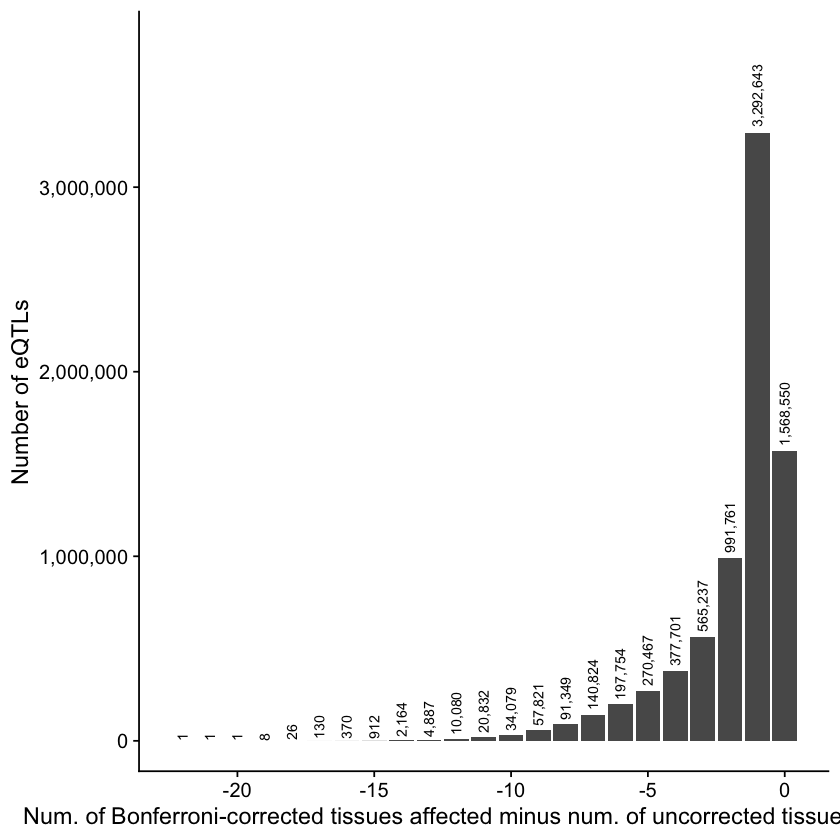

In [11]:
barplot <- ggplot(data=eQTLsAndNumTissuesAffected, aes(x=diffUncorrectedVBonferroni)) +
geom_bar() +
theme_cowplot() +
geom_text(stat='count', aes(label=comma(..count.., accuracy = 1)), angle = 90, hjust=-0.1, size=3) +
scale_y_continuous(label=comma, expand = expand_scale(add = c(0.6, .6), mult = c(0.05, .2))) +
labs(x = "Num. of Bonferroni-corrected tissues affected minus num. of uncorrected tissues affected", y = "Number of eQTLs") +
theme(legend.position = "right", legend.direction = "vertical")
barplot

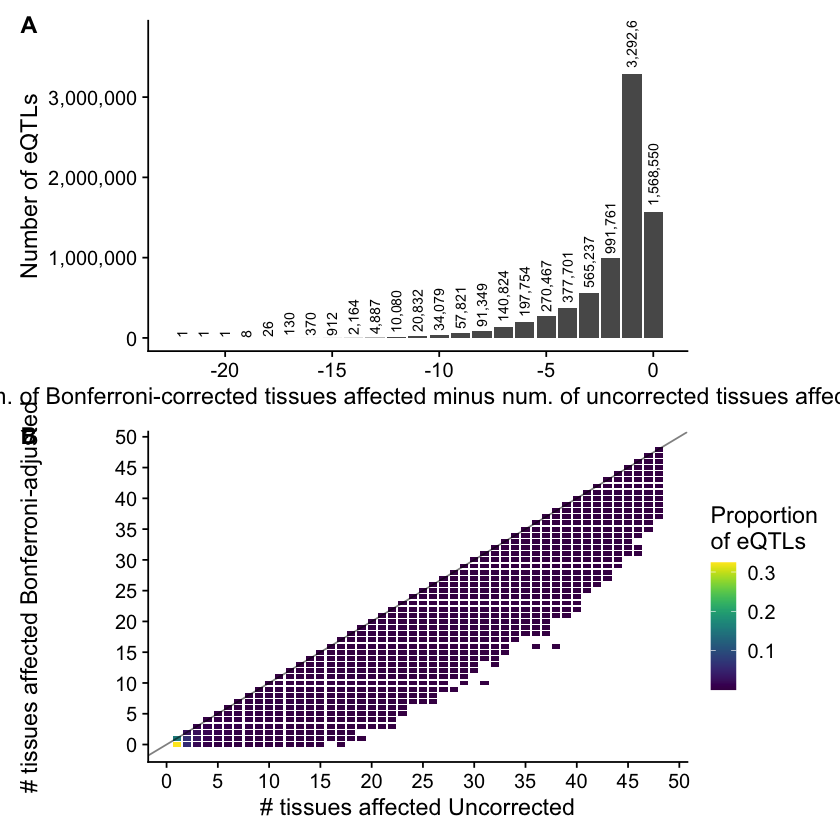

In [12]:
barplot / heatmap1 + plot_annotation(tag_levels = 'A')

In [13]:
ggsave('../outputFiles/figures/eQTLDatasetComparisonBonferroniVsUncorrected.svg', width = 26, height = 30, units = "cm", dpi = 300)

In [14]:
ggsave('../outputFiles/figures/eQTLDatasetComparisonBonferroniVsUncorrected.pdf', width = 26, height = 30, units = "cm", dpi = 300)

### Bonferroni-corrected vs Metasoft

In [15]:
eQTLsAndNumTissuesAffected$diffMetasoftVBonferroni <- eQTLsAndNumTissuesAffected$countMetasoft - eQTLsAndNumTissuesAffected$countBonferroniCorrected

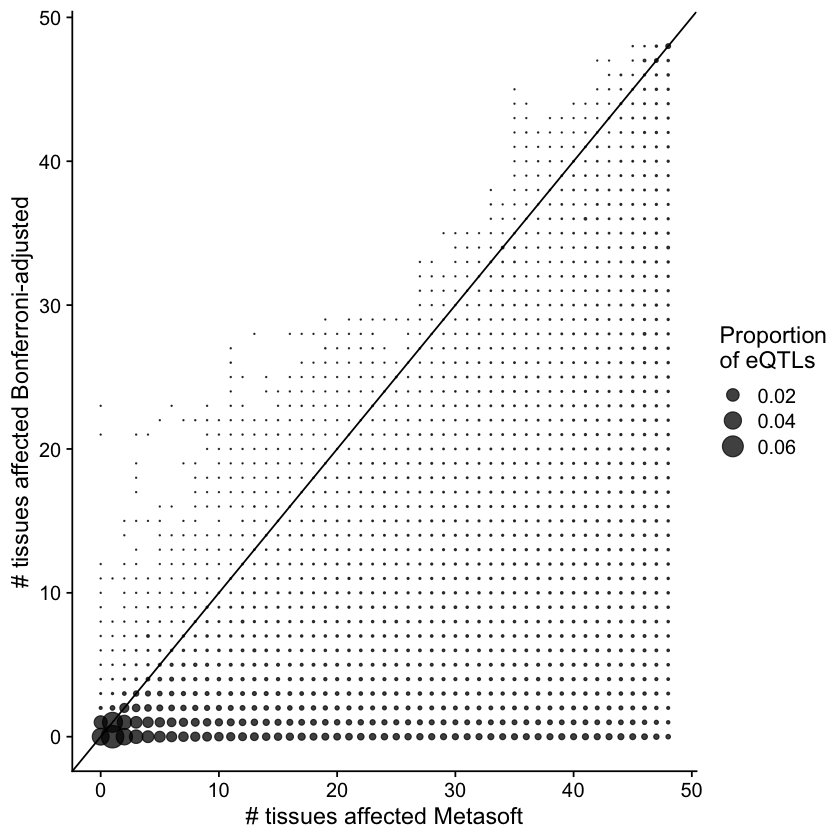

In [16]:
dotplot2 <- ggplot(eQTLsAndNumTissuesAffected, aes(countMetasoft, countBonferroniCorrected)) +
geom_count(aes(size = ..prop..), alpha=0.75) +
geom_abline(intercept = 0, slope = 1) +
scale_size_area("Proportion\nof eQTLs") +
labs(x = "# tissues affected Metasoft", y = "# tissues affected Bonferroni-adjusted") +
theme_cowplot() +
theme(legend.position = "right", legend.direction = "vertical")
dotplot2

In [17]:
BonferroniMetasoftGrouped <- aggregate(eQTLsAndNumTissuesAffected, by=list(eQTLsAndNumTissuesAffected$countMetasoft, eQTLsAndNumTissuesAffected$countBonferroniCorrected), FUN=length)[c('Group.1','Group.2','gene_id')]
BonferroniMetasoftGrouped

Group.1,Group.2,gene_id
<int>,<dbl>,<int>
0,0,291448
1,0,538667
2,0,274829
3,0,181141
4,0,133227
5,0,109761
6,0,93176
7,0,81274
8,0,74445


In [18]:
BonferroniMetasoftGrouped$proportion <- BonferroniMetasoftGrouped$gene_id / sum(BonferroniMetasoftGrouped$gene_id)

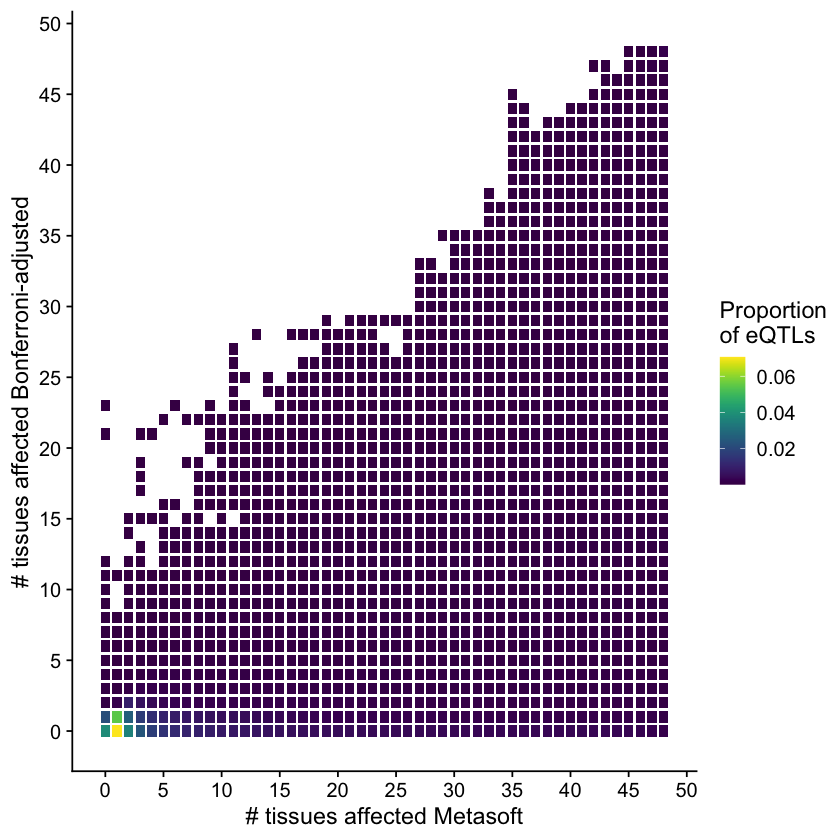

In [19]:
heatmap2 <- ggplot(BonferroniMetasoftGrouped, aes(Group.1, Group.2)) +
geom_tile(aes(fill = proportion), width=0.8, height=0.8) + 
scale_fill_viridis(discrete=FALSE, name="Proportion\nof eQTLs") +
scale_x_continuous(breaks = extended_breaks(n = 10)) + 
scale_y_continuous(breaks = extended_breaks(n = 10)) +
labs(x = "# tissues affected Metasoft", y = "# tissues affected Bonferroni-adjusted") +
theme_cowplot() +
theme(legend.position = "right", legend.direction = "vertical")
heatmap2

Warning message:
“`expand_scale()` is deprecated; use `expansion()` instead.”


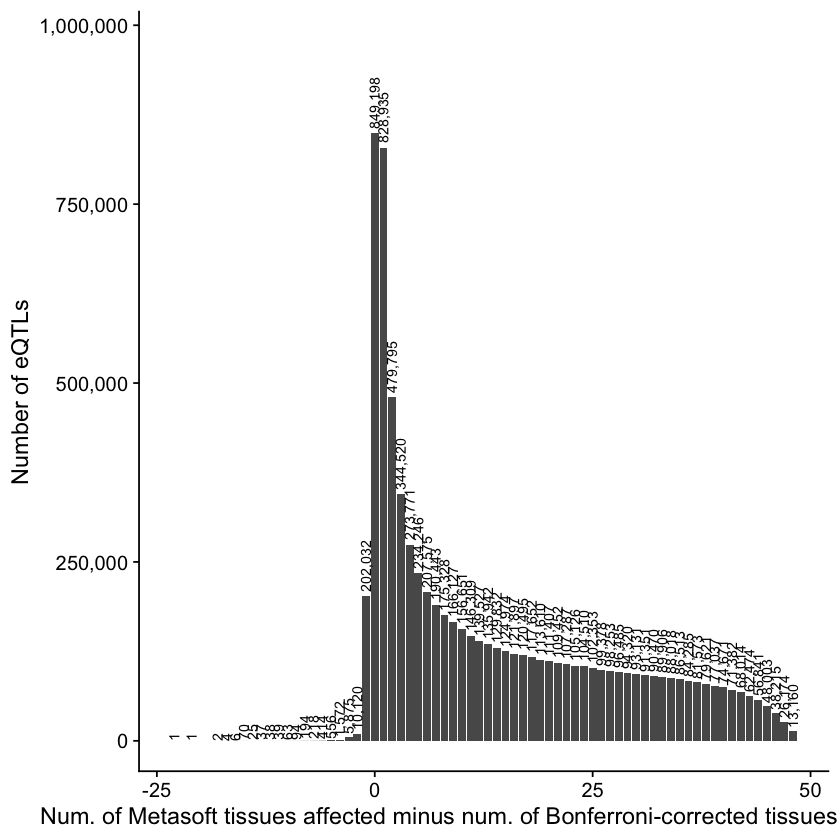

In [20]:
barplot2 <- ggplot(data=eQTLsAndNumTissuesAffected, aes(x=diffMetasoftVBonferroni)) +
geom_bar() +
theme_cowplot() +
geom_text(stat='count', aes(label=comma(..count.., accuracy = 1)), angle = 90, hjust=-0.1, size=3) +
scale_y_continuous(label=comma, expand = expand_scale(add = c(0.6, .6), mult = c(0.05, .2))) +
labs(x = "Num. of Metasoft tissues affected minus num. of Bonferroni-corrected tissues affected", y = "Number of eQTLs") +
theme(legend.position = "right", legend.direction = "vertical")
barplot2

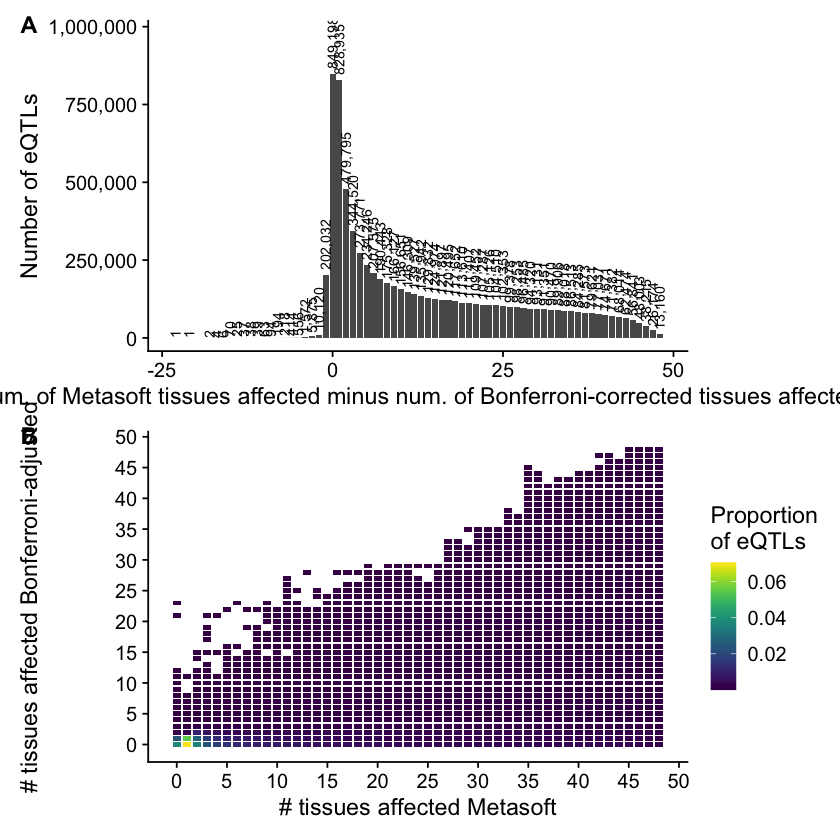

In [21]:
barplot2 / heatmap2 + plot_annotation(tag_levels = 'A')

In [22]:
ggsave('../outputFiles/figures/eQTLDatasetComparisonBonferroniVsMetasoft.svg', width = 26, height = 30, units = "cm", dpi = 300)

In [23]:
ggsave('../outputFiles/figures/eQTLDatasetComparisonBonferroniVsMetasoft.pdf', width = 26, height = 30, units = "cm", dpi = 300)